In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

<h3>Los modelos hacen lo que pueden, la diferencia puede estar en los datos, así que vamos a remover las marcas para ver como se comportan los modelos. 

In [9]:
df = pd.read_json('../Data/processed/data_ml.json')
df.head()

,Año,Kilómetros,Cilindrada,Potencia (cv),Consumo l/100,Precio,Marca_Gama alta,Marca_Gama lujo,Marca_Gama media,Combustible_Diésel,Combustible_GLP,Combustible_Gasolina,Combustible_Híbrido,Transmisión_Automática,Transmisión_Manual
0,2019,47413,1600,117,6.6,18990,0,0,1,0,0,1,0,0,1
1,2019,40800,2100,136,5.3,21990,1,0,0,1,0,0,0,1,0
2,2019,62122,900,90,5.4,12990,0,0,1,0,0,1,0,0,1
3,2022,5338,1500,150,5.7,20490,0,0,1,0,0,1,0,0,1
4,2021,58885,1500,110,3.6,14490,0,0,1,1,0,0,0,0,1


In [10]:
df = df.drop(columns= ['Marca_Gama alta', 'Marca_Gama lujo', 'Marca_Gama media'])
df.head()

,Año,Kilómetros,Cilindrada,Potencia (cv),Consumo l/100,Precio,Combustible_Diésel,Combustible_GLP,Combustible_Gasolina,Combustible_Híbrido,Transmisión_Automática,Transmisión_Manual
0,2019,47413,1600,117,6.6,18990,0,0,1,0,0,1
1,2019,40800,2100,136,5.3,21990,1,0,0,0,1,0
2,2019,62122,900,90,5.4,12990,0,0,1,0,0,1
3,2022,5338,1500,150,5.7,20490,0,0,1,0,0,1
4,2021,58885,1500,110,3.6,14490,1,0,0,0,0,1


In [11]:
target = df.iloc[:, 5]
target

0       18990
1       21990
2       12990
3       20490
4       14490
        ...  
4803     7990
4804    19390
4805    19990
4806     9990
4807    43990
Name: Precio, Length: 4803, dtype: int64

In [12]:
cols_name = df.drop('Precio',axis=1).columns
df_2 = df.iloc[:, :5]
scaler = StandardScaler()
scaler.fit(df_2)

StandardScaler()

In [13]:
data_scaled = scaler.transform(df_2)
data_scaled

array([[ 0.46025729, -0.54278093,  0.13235563, -0.28989689,  1.57907552],
       [ 0.46025729, -0.70524565,  1.32773753,  0.15527316,  0.29835984],
       [ 0.46025729, -0.18141791, -1.54117902, -0.92250697,  0.39687643],
       ...,
       [-1.75745516,  0.99973724,  1.56681391,  0.4832932 ,  0.98797598],
       [-0.87037018,  0.3092683 , -0.82394989, -1.41453703, -0.09570652],
       [-0.42682769,  0.38044028,  1.08866115,  2.59199345,  0.7909428 ]])

In [14]:
dummie_data = np.array(df.iloc[:, 6:])
data = np.concatenate((data_scaled, dummie_data), axis=1)
data.shape

(4803, 11)

In [15]:
data = pd.DataFrame(data, columns= ['year','km','cc','cv','consum','diesel','glp','gasol','hybrid','auto','manual'])
data

,year,km,cc,cv,consum,diesel,glp,gasol,hybrid,auto,manual
0,0.460257,-0.542781,0.132356,-0.289897,1.579076,0.0,0.0,1.0,0.0,0.0,1.0
1,0.460257,-0.705246,1.327738,0.155273,0.298360,1.0,0.0,0.0,0.0,1.0,0.0
2,0.460257,-0.181418,-1.541179,-0.922507,0.396876,0.0,0.0,1.0,0.0,0.0,1.0
3,1.790885,-1.576458,-0.106721,0.483293,0.692426,0.0,0.0,1.0,0.0,0.0,1.0
4,1.347342,-0.260943,-0.106721,-0.453907,-1.376422,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4798,-1.313913,0.663163,-1.302103,-1.367677,-0.785323,0.0,0.0,1.0,0.0,0.0,1.0
4799,-2.644540,2.492457,1.088661,0.951893,0.889459,1.0,0.0,0.0,0.0,1.0,0.0
4800,-1.757455,0.999737,1.566814,0.483293,0.987976,1.0,0.0,0.0,0.0,1.0,0.0
4801,-0.870370,0.309268,-0.823950,-1.414537,-0.095707,0.0,0.0,1.0,0.0,0.0,1.0


In [16]:
data_train, data_test, target_train, target_test = train_test_split(
    data,
    target,
    test_size= 0.25,
    random_state= 42
)

In [17]:
randfor = RandomForestRegressor(
    n_estimators= 200,
    max_depth= 15,
    min_samples_leaf= 3,
    random_state= 42
)

In [18]:
randfor.fit(data_train, target_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=3, n_estimators=200,
                      random_state=42)

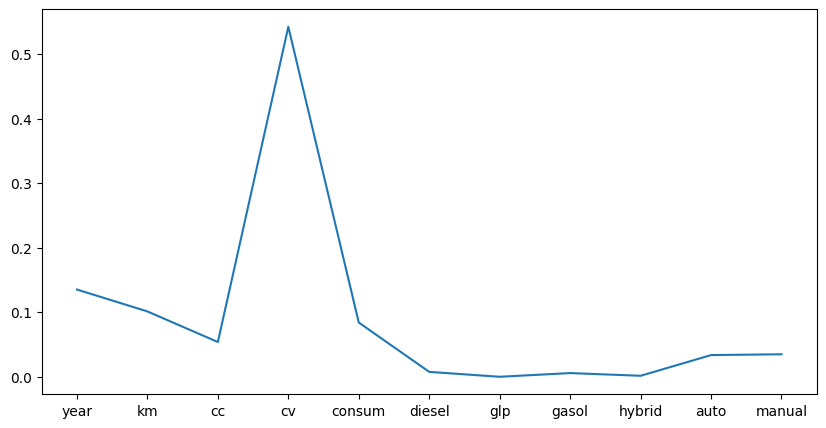

In [19]:
plt.figure(figsize=(10,5))
plt.plot(randfor.feature_names_in_, randfor.feature_importances_)

In [20]:
predicted = randfor.predict(data_test)
pd.DataFrame(data= {'predicted':predicted, 'real':target_test, 'error':(abs(target_test-predicted))}).head(15)

,predicted,real,error
596,19499.589014,20990,1490.410986
3374,14345.750984,13990,355.750984
2704,10249.630157,8990,1259.630157
2475,19168.984221,25490,6321.015779
8,14039.437254,13990,49.437254
577,21768.533204,17990,3778.533204
3174,11822.383048,12490,667.616952
812,11215.105434,9990,1225.105434
2078,20300.317040,17190,3110.317040
4035,17570.746470,18990,1419.253530


In [21]:
print('MSE: ', mean_squared_error(target_test, predicted))
print('RMSE: ', mean_squared_error(target_test, predicted, squared=False))
print('MAE: ', mean_absolute_error(target_test, predicted))
print('R2 score: ', r2_score(target_test, predicted))

MSE:  13129564.6943913
RMSE:  3623.4741194592934
MAE:  2540.1103584847697
R2 score:  0.6687665410120158


<h4>Lamentablemente, no existen los milagros en ML.